In [2]:
# Handling all the imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [7]:
# defining the cols in data
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
# Reading the data frame
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")
# we use seperator as to classify the data into columns as we do not always get pre col data
# here \s+ is used to serve the purpose

In [8]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# plotting the data against each other, with actually not using the class
# we will pretend that this data is not useful and we'll predict this data
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        # Here the hue wull compare the three different classes with three different colors in the plot
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

# Clustering

In [13]:
# Using the sklearn module to import KMeans
from sklearn.cluster import KMeans

In [61]:
x = "compactness"
y = "asymmetry"
X = df[[x,y]].values

In [62]:
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [63]:
# This gives the predictions that from our cluster model
clusters = kmeans.labels_

In [64]:
clusters

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1])

In [65]:
# These are the actual values that we get with the dataset
# and we can also use this data to compare with our predicted value
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [66]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns = [x,y,"class"])

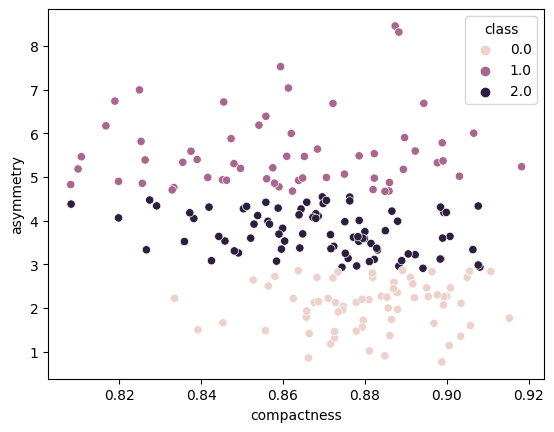

In [67]:
# K Means Classes, as predicted
sns.scatterplot(x=x,y=y, hue='class', data=cluster_df)
plt.show()

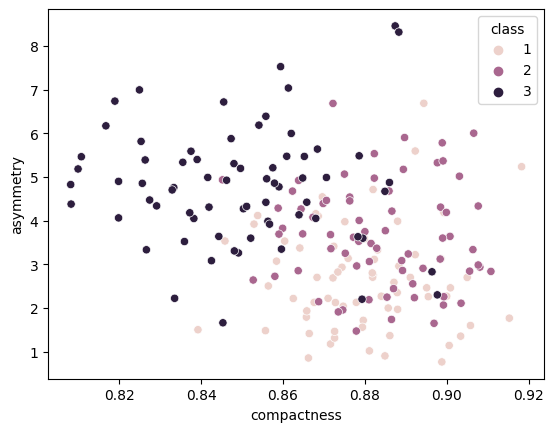

In [68]:
# printing the original plot
sns.scatterplot(x=x,y=y, hue='class', data=df)
plt.show()

# Higher Dimentions

In [72]:
# Actually using all the dimentions insted of only one
X = df[cols[:-1]].values
kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns = df.columns)

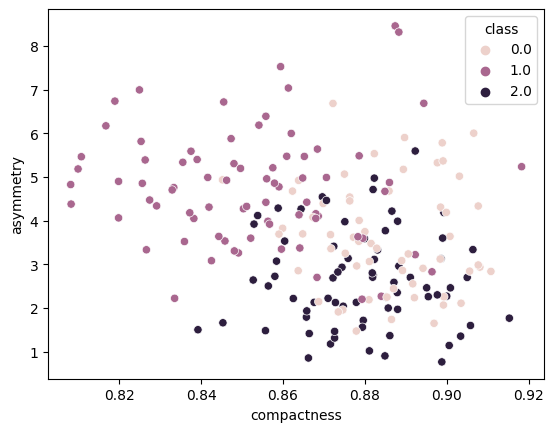

In [73]:
# K Means Classes, as predicted
sns.scatterplot(x=x,y=y, hue='class', data=cluster_df)
plt.show()

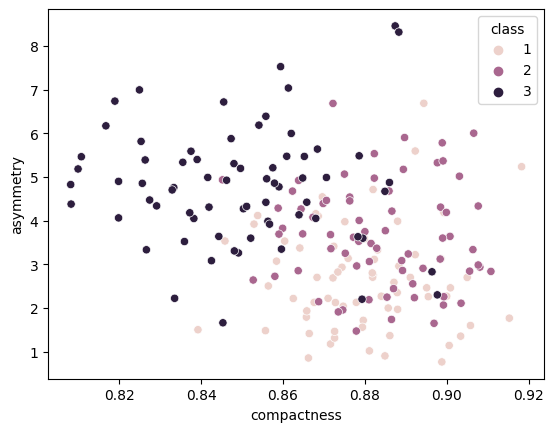

In [71]:
# K Means Classes, as predicted
sns.scatterplot(x=x,y=y, hue='class', data=df)
plt.show()

# PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
# Component is how many dimentions i want to map it into
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [78]:
X.shape
# Can we seen as I had 210 samples and each of them has 7 features

(210, 7)

In [79]:
transformed_x.shape

(210, 2)

In [80]:
# taking a look at the first five things
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

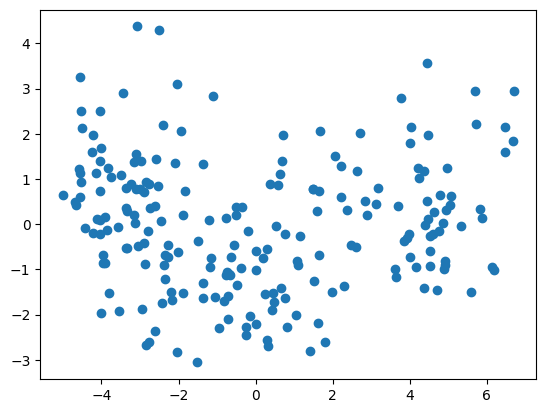

In [83]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [84]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [85]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

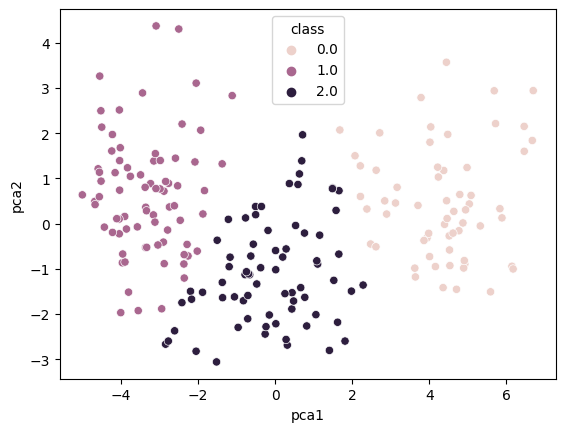

In [86]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()